In [2]:
# @itsvenu_
# LogisticRegression - binary classification

# ln(p/1-p) = b0+b1x
# p = 1/1+e**-y

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [9]:
dat = pd.read_csv('../../data/Social_Network_Ads.csv')
dat = dat.iloc[:, 2:]
dat.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [11]:
# X and Y
X = dat.iloc[:, :-1].values
Y = dat.iloc[:, -1].values

In [13]:
# split the data into training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [16]:
# feature scaling
sc = StandardScaler()

In [18]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# model
logReg = LogisticRegression(random_state=42, solver='liblinear')

In [27]:
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
X_test[:2]

array([[ 0.79753468, -1.40447546],
       [ 2.07309956,  0.51542886]])

In [29]:
Y_test[:2]

array([0, 1])

In [31]:
logReg.predict([[2.07309956, 0.51542886]])

array([1])

In [33]:
# probabilities of test data
logReg.predict_proba(X_test)[:5]

array([[0.73022698, 0.26977302],
       [0.02511576, 0.97488424],
       [0.97632609, 0.02367391],
       [0.13995186, 0.86004814],
       [0.9829281 , 0.0170719 ]])

In [35]:
# direct binary outcome from test data
logReg.predict(X_test)[:5]

array([0, 1, 0, 1, 0])

In [37]:
Y_pred = logReg.predict(X_test)
Y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [41]:
Ytrue_Ypred = np.concatenate((Y_test.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1)
Ytrue_Ypred[:5]

array([[0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0]])

In [55]:
confusion_matrix(Y_test, Y_pred)

array([[50,  2],
       [ 8, 20]])

In [56]:
accuracy_score(Y_test, Y_pred)

0.875

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


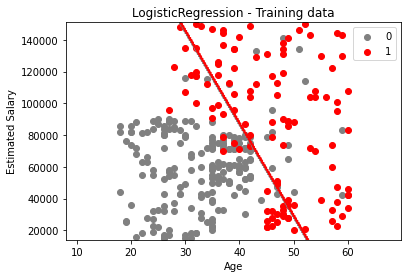

In [69]:
# visualize results
X_set, Y_set = sc.inverse_transform(X_train), Y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contour(X1, X2, logReg.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('gray', 'red')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('gray', 'red'))(i), label = j)
    
plt.title('LogisticRegression - Training data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


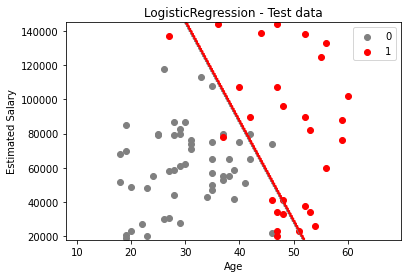

In [70]:
# test data results
X_set, Y_set = sc.inverse_transform(X_test), Y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contour(X1, X2, logReg.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('gray', 'red')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('gray', 'red'))(i), label = j)
    
plt.title('LogisticRegression - Test data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()